In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

$$f=ma \frac{1}{2}$$

In [2]:
#Sampling from Guassian => Find P(0) (using KDE); The Model of 0 Vector
#d==dimension
d=2
mean = np.ones(d)

#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=(0.1)*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5)*np.exp((-0.5)*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=20000)
P0 = 0
for m in samples:
    P0 += (20000)**(-1.0)*g.evaluate(x,m)
   
#print(samples)
print(P0)
print(len(mean))  #Check dim

0.1472848221755504
2


[0.00226426 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.         0.
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.2208297  0.
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.2208297  0.20309836
 0.         0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.2208297  0.20309836
 0.12157085 0.         0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.2208297  0.20309836
 0.12157085 0.14683934 0.         0.         0.        ]
[0.00226426 0.0633815  0.13165743 0.21802433 0.2

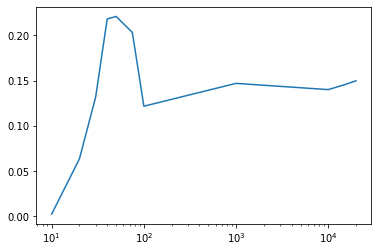

In [3]:
#Generate Random Samples, Used as a check to see convergence
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000, 10000, 15000, 20000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)

plt.plot(sample_length, pval)
plt.xscale('log')

In [4]:
#KD-Tree Time :O
#From samples, find k+1 nearest neighbors with kdtree, k=100 nearest neighbors
kdtree = KDTree(samples)
query = kdtree.query(x=np.zeros(d), k=1000)
#Query KD-Tree for nearest Neighbors
print(query)
index = query[1]
print(index)
data = kdtree.data[index]
#Get data points of the nearest neighbors
print(data)

(array([0.02004555, 0.03097244, 0.03185299, 0.03234891, 0.03458556,
       0.03723696, 0.037546  , 0.03959888, 0.04058412, 0.04375059,
       0.04408185, 0.04591435, 0.04633925, 0.04664395, 0.04715916,
       0.0496474 , 0.05392446, 0.05497467, 0.05840051, 0.05840447,
       0.05988667, 0.06101766, 0.06170706, 0.06665859, 0.06965669,
       0.07367454, 0.07440959, 0.07805342, 0.07974215, 0.08156032,
       0.08198168, 0.08324627, 0.08710494, 0.08898795, 0.09110003,
       0.09240086, 0.09263032, 0.09500957, 0.09565634, 0.09660885,
       0.09838932, 0.0984973 , 0.09987717, 0.1015071 , 0.10326914,
       0.1046166 , 0.10551416, 0.10605566, 0.10635998, 0.10810977,
       0.10980015, 0.11075516, 0.1108231 , 0.11180302, 0.11262629,
       0.11393772, 0.11445034, 0.11584246, 0.11601439, 0.11629011,
       0.11811223, 0.11827572, 0.11862393, 0.11945307, 0.11947855,
       0.12240943, 0.12246608, 0.12316847, 0.12367644, 0.12468218,
       0.12613596, 0.12619022, 0.12630381, 0.1264673 , 0.1266

In [5]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=1000)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 

#print(len(data))
#print(data)

print(pvalsamples)

19999[3.01316336 0.3852258  2.24551697 ... 1.13604812 2.80990497 2.95860985]


In [6]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        #print('Yeehaw!')
        Accept.append([i,Pi])
    else:
        #print('Nope lol, you tried')
        Reject.append([i,Pi])

print(len(Accept))
print(len(Reject))

#print(Accept)
#print(Reject)  

19727
273


In [7]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(1000)

Redemption = []
Death = []

# Reject[i] = [index,Pval]
for i in range(len(Reject)):
    Re = Reject[i][1] #Pval
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Reject[i][0]) #append index
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

273 0
[12, 44, 82, 89, 314, 383, 471, 699, 794, 829, 833, 846, 927, 936, 983, 1010, 1266, 1485, 1565, 1717, 1737, 1811, 1866, 1933, 1989, 2001, 2056, 2059, 2119, 2261, 2350, 2369, 2558, 2567, 2650, 2668, 2857, 2892, 3029, 3174, 3227, 3296, 3677, 3680, 3691, 3755, 3841, 3872, 3896, 3919, 3964, 4039, 4064, 4121, 4213, 4250, 4290, 4346, 4455, 4457, 4529, 4535, 4625, 4634, 4750, 4767, 4817, 4982, 5102, 5142, 5168, 5243, 5364, 5369, 5469, 5541, 5725, 5779, 5780, 5784, 5814, 5815, 5839, 6121, 6210, 6326, 6338, 6342, 6493, 6590, 6593, 6641, 6837, 6858, 6926, 6933, 6934, 7081, 7126, 7677, 7721, 7723, 7746, 7810, 7867, 7891, 7918, 7939, 8070, 8084, 8280, 8286, 8297, 8429, 8468, 8712, 8757, 9112, 9133, 9212, 9239, 9310, 9410, 9464, 9802, 9826, 9889, 10163, 10277, 10384, 10462, 10471, 10527, 10543, 10545, 10561, 10608, 10615, 10671, 10710, 10737, 11081, 11261, 11286, 11330, 11341, 11443, 11519, 11560, 11728, 11938, 11971, 12010, 12040, 12072, 12128, 12156, 12297, 12342, 12466, 12521, 12570, 12617

In [8]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before
#What might be work is instead of adding the pval to an array, add the index of the points that pass of fail. 
#So if the 357th point fails, you can just call samples[357] to get the point again

pxiarray = np.zeros(len(Redemption))
for i in range(len(Redemption)):
    xi = samples[Redemption[i]]
    xiquery = kdtree.query(xi, k=len(samples))
    xiindex = xiquery[1]
    xidata = kdtree.data[xiindex]   #Points that are NN
    Pxi = (len(samples))**(-1.0)
    for j in range(5*NN):
        Pxi += (len(samples))**(-1.0)*g.evaluate(xi, xidata[j])

    pxiarray[i]=Pxi

print(pxiarray)     

[0.00164206 0.00405179 0.00609418 0.00235528 0.00353498 0.00027032
 0.0040574  0.00208626 0.00709872 0.00533985 0.0014151  0.00176636
 0.00252703 0.00622375 0.00328527 0.00574803 0.0004982  0.00329079
 0.00647464 0.0013323  0.00344992 0.00624845 0.00279581 0.00255658
 0.00350095 0.0021861  0.00163921 0.00031206 0.00153895 0.00484259
 0.00241608 0.00212427 0.00591248 0.00403732 0.00162361 0.00515228
 0.00402056 0.00549668 0.00383349 0.00372872 0.00563309 0.0063081
 0.00203104 0.00558133 0.00584576 0.00529153 0.00525997 0.00668059
 0.00241841 0.00348766 0.00342786 0.00158825 0.00427098 0.00555205
 0.00306512 0.00690138 0.00489586 0.0019556  0.00671167 0.00125656
 0.00148393 0.00277719 0.00448475 0.00170256 0.00625095 0.0063481
 0.00039933 0.00218642 0.00318496 0.00174698 0.00413241 0.00366999
 0.00238666 0.00356491 0.00359169 0.00131581 0.0067137  0.00115982
 0.00137828 0.00290701 0.00505292 0.00725768 0.00516288 0.0021345
 0.00299078 0.00505526 0.00733441 0.00115605 0.00708934 0.0017084

In [9]:
#Check same conditions as before
Accept1 = []
Reject1 =[]
for i in range(len(pxiarray)):
    pxi = pxiarray[i]
    if (pxi >= P0):
        Accept1.append([i,pxi])
    else:
        Reject1.append([i, pxi])

print(len(Accept1))
print(len(Reject1))

0
273


In [10]:
#Out on the side, who will survive? How many points were lost in the fires of rejected points lol

#what comes out is the number of points that need to
Redemption1 = []
Death1 = []

for i in range(len(Reject1)):
    Re1 = Reject1[i][1] #Pval
    if (Re1*(len(samples)- NN) >= P0):
        Redemption1.append(Reject1[i][0]) #append index
    else:
        Death1.append(Re1)
        
print(len(Redemption1), len(Death1))
print(Redemption1)

273 0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [11]:
WEE = len(Redemption1)/len(samples)
print(WEE)


# d=5 and up, do not pass convergence test

0.01365
